### Week 5 Programming Assignment

Create a new Jupyter notebook. Using the code in the bottom of the Week 4 notebook, import the notMNIST dataset and create a training/testing split of the data. 
Train a neural network on the dataset using Keras. Experiment with both sigmoid and ReLU activations, different numbers of neurons in each layer, and different regularization settings. (Only use dense layer for this assignment.) 
Plot the loss of the network (using 'categorical_crossentropy').
Keep your best result. Save the notebook as pdf and turn it in, a zipped html is also fine in case you are unable to save as pdf.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
data = loadmat('notMNIST_small.mat')
X_temp = data['images']/255

#for i in range(X_temp.shape[2]):
    
X = np.empty(shape=[X_temp.shape[2]] + [784], dtype='float32')
for i in range(X_temp.shape[2]):
    X[i,:] = X_temp[:,:,i].flatten()

y = pd.get_dummies(data['labels']).as_matrix()


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=50)
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(14979L, 784L)
(14979L, 10L)
(3745L, 784L)
(3745L, 10L)


C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [40]:
data.keys()


['images', 'labels', '__version__', '__header__', '__globals__']

In [41]:
data.values()

[array([[[  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,   1.,   0., ...,   0.,   0.,   0.],
         [  0.,   0.,   0., ...,   0.,   0.,   0.],
         ...,
         [255.,   0., 215., ...,   0., 160., 124.],
         [255.,   0., 227., ...,   0., 122.,  72.],
         [255.,   0., 156., ...,   0.,   0.,  12.]],
 
        [[  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,  19.,   0., ...,   0.,   0.,   0.],
         [  0.,  93.,   0., ...,   0.,   0.,   0.],
         ...,
         [255.,   0., 255., ...,   0., 255., 255.],
         [255.,   0., 110., ...,   0., 206., 227.],
         [255.,   0.,  21., ...,   0.,   0.,  63.]],
 
        [[  0.,   3.,   0., ...,   0.,   0.,   0.],
         [  0., 167.,   0., ...,   0.,   0.,   0.],
         [  0., 255.,   0., ...,   1.,   1.,   0.],
         ...,
         [255.,   0., 223., ...,   1., 252., 255.],
         [255.,   0.,   0., ...,   0., 192., 228.],
         [255.,   0.,   0., ...,   0.,   0.,  68.]],
 
        ...,


## Best Model
### Sigmoid MLP with l2 regularization set to 0.01 and categorical crossentropy loss

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from keras.optimizers import SGD

stdscaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled  = stdscaler.transform(X_test)

# Stochastic Logistic Regression
model = Sequential()

# validation loss 
model.add(Dense(output_dim=10, input_shape=[784], #dimensions 28*28=784
                activation='sigmoid', W_regularizer=l2(0.01)))

sgd = SGD(lr=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", input_shape=[784], kernel_regularizer=<keras.reg..., units=10)`
  from ipykernel import kernelapp as app


In [12]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Fit the model
history = model.fit(X_train_scaled, y_train, batch_size = 256, #0 to 255 color map per pixel
          nb_epoch = 100, verbose=0, validation_data=(X_test_scaled,y_test))

C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Loss after final iteration:  0.5119021959553096


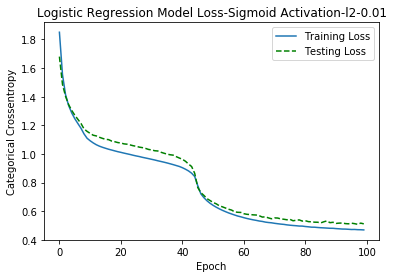

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('Logistic Regression Model Loss-Sigmoid Activation-l2-0.01')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print "Loss after final iteration: ", history.history['val_loss'][-1]
plt.show()

## Other Models Used
### Sigmoid MLP with l2 regularization set to 0.001 and categorical crossentropy loss

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from keras.optimizers import SGD

stdscaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled  = stdscaler.transform(X_test)

# Stochastic Logistic Regression
model = Sequential()

# validation loss 
model.add(Dense(output_dim=10, input_shape=[784], #dimensions 28*28=784
                activation='sigmoid', W_regularizer=l2(0.001)))

sgd = SGD(lr=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", input_shape=[784], kernel_regularizer=<keras.reg..., units=10)`
  from ipykernel import kernelapp as app


In [16]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Fit the model
history = model.fit(X_train_scaled, y_train, batch_size = 256, #0 to 255 color map per pixel
          nb_epoch = 100, verbose=0, validation_data=(X_test_scaled,y_test))

C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Loss after final iteration:  0.5356985949706012


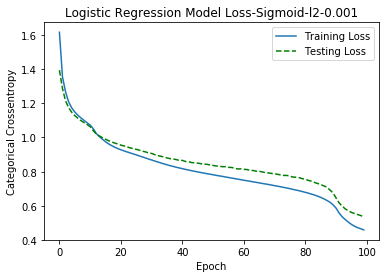

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('Logistic Regression Model Loss-Sigmoid-l2-0.001')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print "Loss after final iteration: ", history.history['val_loss'][-1]
plt.show()

### ReLu 

In [66]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from keras.optimizers import SGD

stdscaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled  = stdscaler.transform(X_test)

# Stochastic Logistic Regression
model = Sequential()

# validation loss 
model.add(Dense(output_dim=10, input_shape=[X_train_scaled.shape[1]], #dimensions 28*28=784
                activation='relu', W_regularizer=l1(0.01)))
model.add(Dense(output_dim=10, activation='relu'))
model.add(Dense(output_dim=10, activation='relu'))

sgd = SGD(lr=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd)
print X_test_scaled.shape
print y_test.shape

C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_shape=[784L], kernel_regularizer=<keras.reg..., units=10)`
  from ipykernel import kernelapp as app
C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10, activation="relu")`
  app.launch_new_instance()


(3745L, 784L)
(3745L, 10L)


C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10, activation="relu")`


In [67]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_21 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [68]:
# Fit the model
history = model.fit(X_train_scaled, y_train, batch_size = 256, #0 to 255 color map per pixel
          nb_epoch = 10, verbose=0, validation_data=(X_test_scaled,y_test))



C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Loss after final iteration:  5.715682070595878


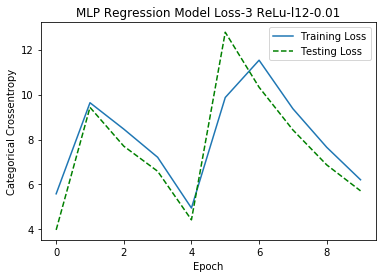

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('MLP Regression Model Loss-3 ReLu-l12-0.01')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print "Loss after final iteration: ", history.history['val_loss'][-1]
plt.show()

### Relu Activation in MLP Regression Model and l2 0.001 Regularization

In [61]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from keras.optimizers import SGD

stdscaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled  = stdscaler.transform(X_test)

# Stochastic Logistic Regression
model = Sequential()

# validation loss 
model.add(Dense(output_dim=10, input_shape=[X_train_scaled.shape[1]], #dimensions 28*28=784
                activation='relu', W_regularizer=l1(0.001)))
model.add(Dense(output_dim=10, activation='relu'))

sgd = SGD(lr=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd)
print X_test_scaled.shape
print y_test.shape

C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_shape=[784L], kernel_regularizer=<keras.reg..., units=10)`
  from ipykernel import kernelapp as app
C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10, activation="relu")`
  app.launch_new_instance()


(3745L, 784L)
(3745L, 10L)


In [62]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [63]:
# Fit the model
history = model.fit(X_train_scaled, y_train, batch_size = 256, #0 to 255 color map per pixel
          nb_epoch = 10, verbose=0, validation_data=(X_test_scaled,y_test))


C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Loss after final iteration:  nan


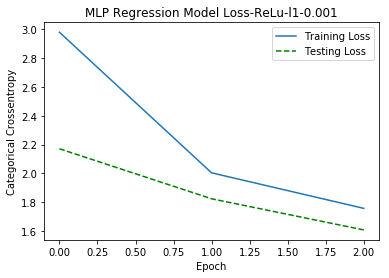

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('MLP Regression Model Loss-ReLu-l1-0.001')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print "Loss after final iteration: ", history.history['val_loss'][-1]
plt.show()

### MLP with two Sigmoid Activation Layers and l2 Regularization of 0.01

In [52]:
# Stochastic Logistic Regression
model = Sequential()

# validation loss 
model.add(Dense(output_dim=10, input_shape=[X_train_scaled.shape[1]], #dimensions 28*28=784
                activation='sigmoid', W_regularizer=l2(0.001)))
model.add(Dense(output_dim=10, activation='sigmoid'))

sgd = SGD(lr=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", input_shape=[784L], kernel_regularizer=<keras.reg..., units=10)`
  
C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10, activation="sigmoid")`
  import sys


In [53]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Fit the model
history = model.fit(X_train_scaled, y_train, batch_size = 256, #0 to 255 color map per pixel
          nb_epoch = 10, verbose=0, validation_data=(X_test_scaled,y_test))

C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Loss after final iteration:  0.8662775741241007


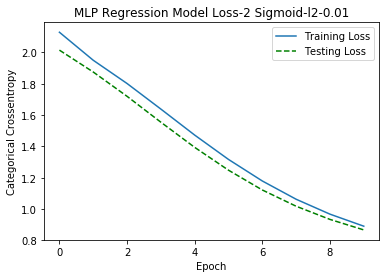

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('MLP Regression Model Loss-2 Sigmoid-l2-0.01')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print "Loss after final iteration: ", history.history['val_loss'][-1]
plt.show()

### MLP Regression Model with 3 Sigmoid Activation layers and l1-0.01

In [57]:
model = Sequential()

# validation loss 
model.add(Dense(output_dim=10, input_shape=[X_train_scaled.shape[1]], #dimensions 28*28=784
                activation='sigmoid', W_regularizer=l1(0.001)))
model.add(Dense(output_dim=10, activation='sigmoid'))
model.add(Dense(output_dim=10, activation='sigmoid'))

sgd = SGD(lr=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", input_shape=[784L], kernel_regularizer=<keras.reg..., units=10)`
  """
C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10, activation="sigmoid")`
  
C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10, activation="sigmoid")`
  import sys


In [58]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________


In [59]:
# Fit the model
history = model.fit(X_train_scaled, y_train, batch_size = 256, #0 to 255 color map per pixel
          nb_epoch = 10, verbose=0, validation_data=(X_test_scaled,y_test))

C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Loss after final iteration:  1.9324108288348596


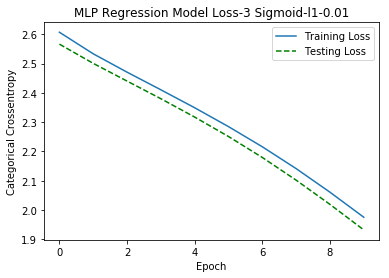

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('MLP Regression Model Loss-3 Sigmoid-l1-0.01')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print "Loss after final iteration: ", history.history['val_loss'][-1]
plt.show()

# Using a Using 30% testing set instead of 20% 
### on the Best Loss Regression model of the above is 1 Sigmoid with l2(0.01)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=50)
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(14979L, 784L)
(14979L, 10L)
(3745L, 784L)
(3745L, 10L)


In [71]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from keras.optimizers import SGD

stdscaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled  = stdscaler.transform(X_test)

# Stochastic Logistic Regression
model = Sequential()

# validation loss 
model.add(Dense(output_dim=10, input_shape=[784], #dimensions 28*28=784
                activation='sigmoid', W_regularizer=l2(0.01)))

sgd = SGD(lr=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", input_shape=[784], kernel_regularizer=<keras.reg..., units=10)`
  from ipykernel import kernelapp as app


In [72]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [73]:
# Fit the model
history = model.fit(X_train_scaled, y_train, batch_size = 256, #0 to 255 color map per pixel
          nb_epoch = 10, verbose=0, validation_data=(X_test_scaled,y_test))

C:\Users\m\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Loss after final iteration:  1.1795632151003992


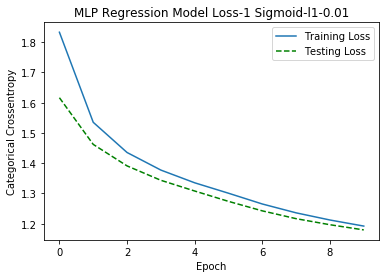

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,4))
# # summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('MLP Regression Model Loss-1 Sigmoid-l1-0.01')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
print "Loss after final iteration: ", history.history['val_loss'][-1]
plt.show()